In [2]:
# Importing all necessary libraries and load dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
mpg = sns.load_dataset('mpg')
mpg.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


#### 1. Create a visual showing the relationship between horsepower and fuel economy.

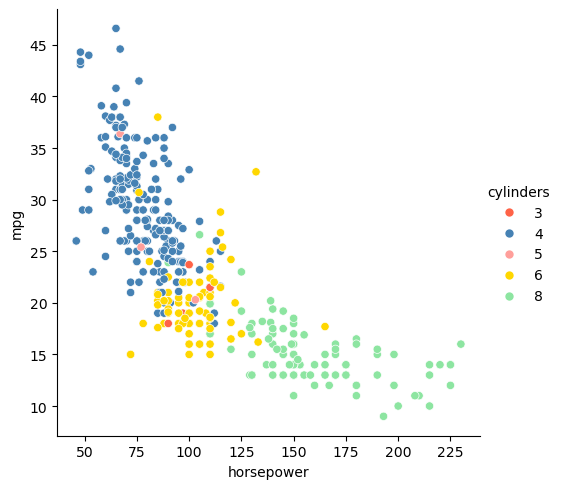

In [5]:
#Using seaborn to make the visual easier and faster instead of using matplolib
#Color ["#a1c9f4","#8de5a1","#ff9f9b","#ff9f9b","#d0bbff") 
custom_palette = ['#FF6347', '#4682B4',"#ff9f9b", '#FFD700',"#8de5a1"]
sns.relplot(data=mpg, x="horsepower", y="mpg", hue="cylinders", palette=custom_palette)
            

##### *Based on the data we can see that cars with higher horsepower(HP) are less economical on fuel. We can also deduce that the lower the number of cylinders in the car the higher the mpg and lower the HP.*

#### 2. Create a table summarizing fuel economy by country of origin

In [9]:
# Group all the countries together and aggregate all the values ()

fuel_econ_by_origin = mpg.groupby("origin").mpg.agg(["mean","min","max","median"]).round(2).reset_index()
fuel_econ_by_origin.rename(columns={'mean': 'Avg MPG', 'min':'Min MPG', 'max' : 'Max MPG', 'median' : 'Median MPG'}, inplace =True )
fuel_econ_by_origin['origin'] = fuel_econ_by_origin['origin'].str.upper()
fuel_econ_by_origin.columns = fuel_econ_by_origin.columns.str.title()  #Converting the colomuns name to title format
fuel_econ_by_origin

,Origin,Avg Mpg,Min Mpg,Max Mpg,Median Mpg
0,EUROPE,27.89,16.2,44.3,26.5
1,JAPAN,30.45,18.0,46.6,31.6
2,USA,20.08,9.0,39.0,18.5


##### *Looking at the table we can see that Japan and Europe both cars with higher mpg. Averaging between 30MPG and 27MPG respectively. While the USA falls short with an average of 20MPG*

#### 3. Create a visual showing how fuel economy has changed over time

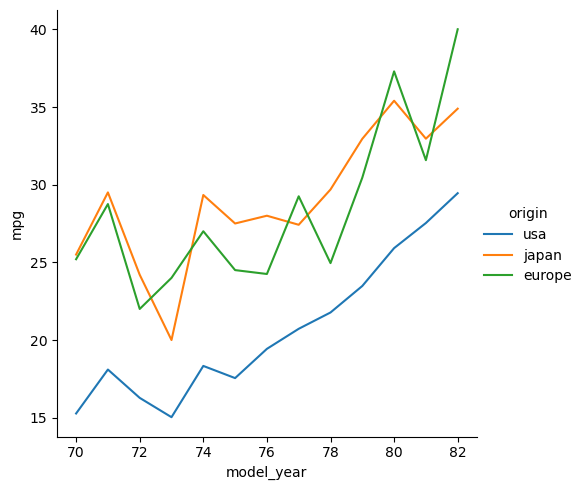

In [13]:
sns.relplot(
    data=mpg, kind='line', 
    x='model_year', y='mpg', hue='origin', 
    errorbar= None
)

##### *Over the years across all countries fuel economy has increased. With the USA seeing a progressive improvement.*

#### 4. Create two other visuals or tables related to fuel economy

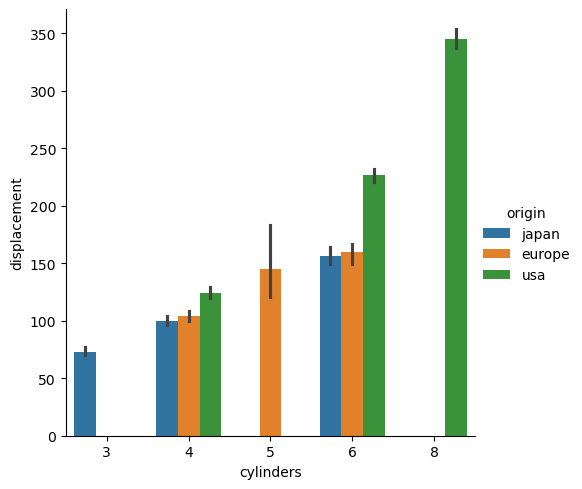

In [17]:
sns.catplot(
    data=mpg, 
    x='cylinders',y='displacement', 
    hue='origin', kind='bar'
)

###### This graph shows the type of car each country produces by cylinders. 
###### Based on the data we can see that Japan tends to only produce cars within the 3-6 cylinders range 
###### while the other countries focus more on power(displacement), especially the USA.


In [20]:
# Find the Name Brand for each car, using the name col. Brand Name is followed by car model.

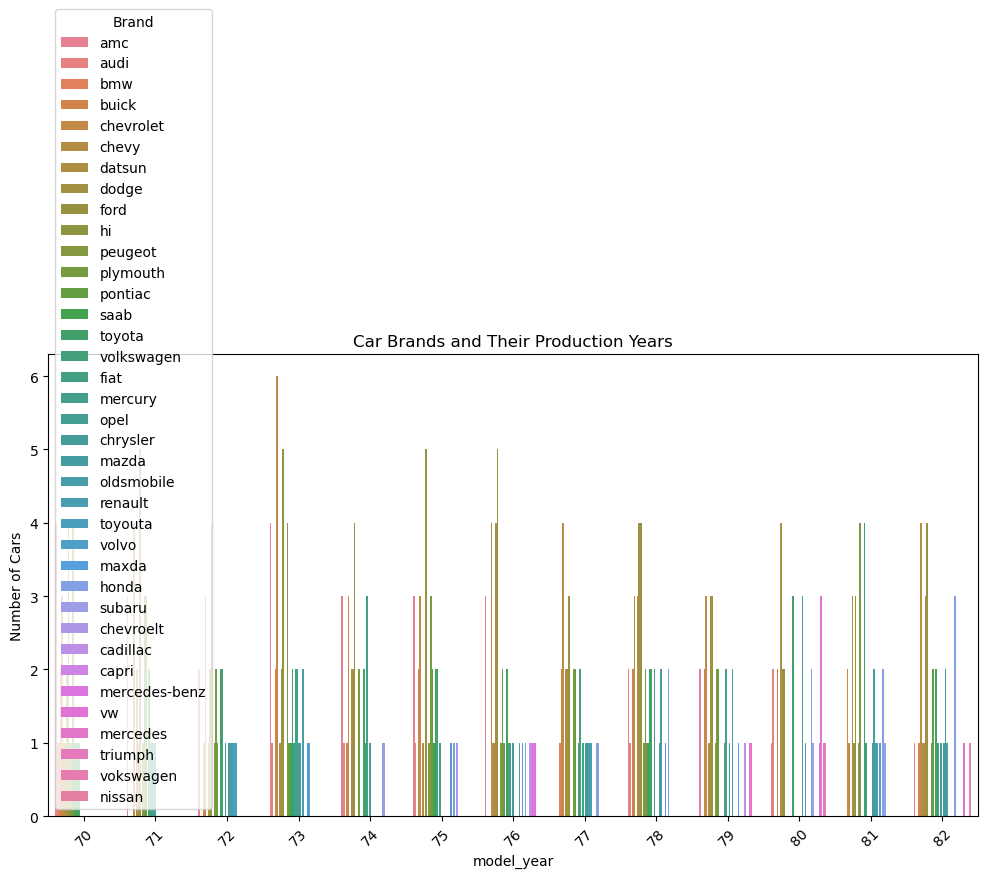

In [23]:
mpg['brand'] = mpg['name'].str.split(' ').str[0]
# Group the data by brand and year, count the occurrences
grouped_data = mpg.groupby(['brand', 'model_year']).size().reset_index(name='count')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='model_year', y='count', hue='brand', data=grouped_data)
plt.title('Car Brands and Their Production Years')
plt.xlabel('model_year')
plt.ylabel('Number of Cars')
plt.xticks(rotation=45)
plt.legend(title='Brand')
plt.show()

###### *This graph shows the Car Brands and the number of cars manufactured.* 
